# Linear Regression

In this tutorial we will implement a linear regression model. We will also implement a function that splits the available data into a training and a testing part.

## Problem Setting

We will use the Boston Housing Dataset. This dataset contains information collected by the U.S Census Service concerning housing in the city of Boston in the state of Massachusetts in 1978. Our goal is to predict the median value of the houses in a particular town in the city of Boston given its attributes. Check the file ’housing.names’ for more information on the attributes.

In [1]:
import urllib
import pandas as pd
import numpy as np
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

from sklearn.datasets import load_boston
boston=load_boston()
testfile = urllib.request.URLopener() # for older versions try to use urllib.URLopener()
testfile.retrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names", "housing.names")
df=pd.DataFrame(boston.data)
df.columns=['crime_rate','res_land_zoned','industry','charles_river','nox','avg_num_rooms','prop_bf_1940','dst_emply_center','rd_highway_idx','tax_rate','stdnt_tchr_ratio','prop_blacks','low_status_pct']
X=boston.data
y=boston.target


In [159]:
df

,crime_rate,res_land_zoned,industry,charles_river,nox,avg_num_rooms,prop_bf_1940,dst_emply_center,rd_highway_idx,tax_rate,stdnt_tchr_ratio,prop_blacks,low_status_pct
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [2]:
col_to_idx = {col:idx for idx,col in enumerate(df.columns)}

In [2]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [4]:
import random, math

In [14]:
random.seed(8)
a = random.sample(range(0,10),5)
a

[3, 5, 6, 1, 7]

In [15]:
set(range(0,10)) - set(a)

{0, 2, 4, 8, 9}

In [15]:
np.random.seed(2)
np.random.shuffle(a)


array([[8, 9],
       [6, 7],
       [1, 2]])

### Exercise 1

Write the *split_train_test(X,y,split,seed)*, given an instance matrix $X \in \mathbb{R}^{N \times D}$, labels $y \in Y^N$, a split ratio in $[0, 1]$ and a random seed $\in \mathbb{Z}$. Split the dataset in $(split×100)\%$ of the instances for training our model and the rest for testing, i.e. 

$$ \left|X_{\text{train}}\right| = \lceil \text{split} \cdot N \rceil, \qquad |X_{\text{train}}| + |X_{\text{test}}| = N. $$
Make sure you use the given random number generator seed so we all get the same results. The function is supposed to return:

- X_train, y_train: the training instances and labels;
- X_test, y_test: the test instances and labels,

in the same order as was mentioned.

Hint: It may be helpful to use shuffling functionality (e.g. np.random.shuffle).

In [3]:
def split_train_test(X,y,split,seed):
    ##################
    #INSERT CODE HERE#
    ##################
    random.seed(seed)
    total = X.shape[0]
    m = math.ceil(split*total)
    train_idx = random.sample(range(0,total),m)
    test_idx = list(set(range(0,total)) - set(train_idx))
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, y_train, X_test, y_test

### Exercise 2

Write the function *train_linear_reg(X_train,y_train,lmbd)*.
Implement the ridge regression model (slide 24). The function should output the learned weight vector $\theta \in \mathbb{R}^D$ or $\mathbb{R}^{D+1}$ (depending on whether you are adding *bias*).

In [4]:
def train_linear_reg(X, y, lmbd):
    ##################
    #INSERT CODE HERE#
    ##################
    theta = np.dot( np.linalg.inv(np.dot(X.T,X) + lmbd*np.identity(X.shape[1])) , np.dot(X.T,y) )
    return theta

In [34]:
seed = 3
lmbd=1
split=0.7
X_train,y_train,X_test,y_test=split_train_test(X,y,split,seed)
theta=train_linear_reg(X_train,y_train,lmbd)
y_pred=predict(X_test,theta)

In [41]:
np.mean(np.absolute(y_pred - y_test))

3.342368409256059

### Exercise 3

Write the function *predict(X,theta)* which predicts housing values vector pred for a dataset X and a previously trained parameter vector $\theta$.

In [5]:
def predict(X, theta):
    ##################
    #INSERT CODE HERE#
    ##################
    y_pred = np.dot(X,theta)
    return y_pred

### Exercise 4

Write the function *mean_abs_loss(y_true,y_pred)* which computes the mean of the absolute differences between our prediction vector $y\_pred$ and the real housing values $y\_true$.

In [6]:
def mean_abs_loss(y_true,y_pred):
    ##################
    #INSERT CODE HERE#
    ##################
    abs_mean = np.mean(np.absolute(y_true - y_pred))
    return abs_mean

### Exercise 5

Evaluate your solutions by running the following code. 

Moreover, answer the following questions: What is the most important feature in your model? Are there features that are not so important? What happens if you remove them? Are there outliers with a high absolute loss?

In [161]:
seed = 3
lmbd=1
split=0.8
X_train,y_train,X_test,y_test=split_train_test(X,y,split,seed)
theta=train_linear_reg(X_train,y_train,lmbd)
y_pred=predict(X_test,theta)
mae=mean_abs_loss(y_test,y_pred)
print ('The mean absolute loss is {loss:0.3f}'.format(loss=mae*1000))

The mean absolute loss is 3356.429


In [162]:

error = {}
for col in df.columns:
    X_new = X[:,col_to_idx[col]].reshape(-1,1)
    seed = 3
    lmbd=1
    split=0.8
    X_train,y_train,X_test,y_test=split_train_test(X_new,y,split,seed)
    theta=train_linear_reg(X_train,y_train,lmbd)
    y_pred=predict(X_test,theta)
    mae=mean_abs_loss(y_test,y_pred)
    error[col] = mae * 1000
error

{'crime_rate': 22423.85398569726,
 'res_land_zoned': 20071.678738648807,
 'industry': 15233.092769173287,
 'charles_river': 22397.31715106995,
 'nox': 9637.739990274062,
 'avg_num_rooms': 5784.586963248062,
 'prop_bf_1940': 12647.948738930843,
 'dst_emply_center': 10304.32008897362,
 'rd_highway_idx': 18067.447033278033,
 'tax_rate': 12591.812487114443,
 'stdnt_tchr_ratio': 8478.425982419752,
 'prop_blacks': 7084.438513868018,
 'low_status_pct': 15320.623476987672}

In [163]:
top_features = ['prop_blacks','stdnt_tchr_ratio','nox','avg_num_rooms','tax_rate','industry',
               'low_status_pct','dst_emply_center','rd_highway_idx','res_land_zoned']
top_f_id = [col_to_idx[col] for col in top_features]
X_mod = X[:,top_f_id]

In [164]:
seed = 3
lmbd=1
split=0.8
X_train,y_train,X_test,y_test=split_train_test(X_mod,y,split,seed)
theta=train_linear_reg(X_train,y_train,lmbd)
y_pred=predict(X_test,theta)
mae=mean_abs_loss(y_test,y_pred)
print ('The mean absolute loss is {loss:0.3f}'.format(loss=mae*1000))

The mean absolute loss is 3342.626


<ipython-input-165-c16056863019>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['target'] = y


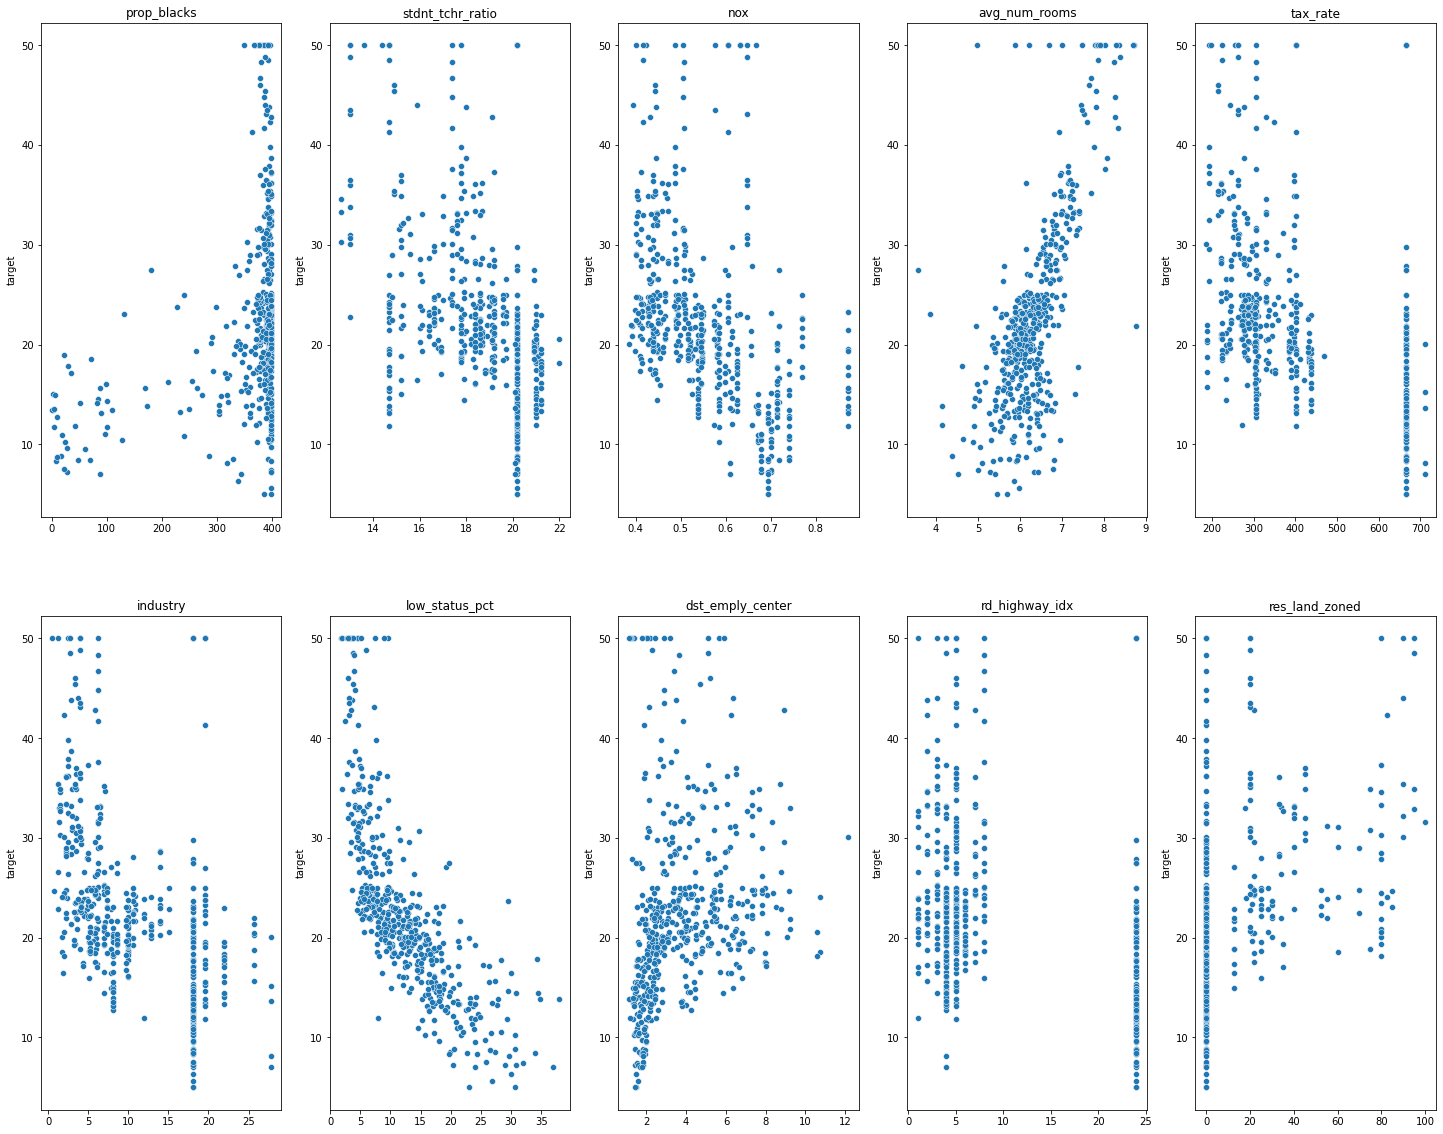

In [165]:
df_new = df[top_features]
df_new['target'] = y
import seaborn as sns
f, axes = plt.subplots(2,5,figsize=(25, 20))

for i,col in enumerate(top_features):
        x = int(i/5)
        y = int(i%5)
        axes[x,y].title.set_text(col)
        #sns.histplot(data = new_d, x = col,bins = 10, ax = axes[x,y]).set(xlabel=None)
        sns.scatterplot(data = df_new, x = col, y = 'target', ax = axes[x,y]).set(xlabel=None)